## Convert measured raw data from Parthe transect III

In [3]:
import pygimli as pg
from pygimli.physics import ert
import pybert as pb  # needed for import Geotom files

Load in the Wenner data

In [4]:
basename = "Parthe2023III"
WEN = [pb.load(basename+part+".wen") for part in "abcde"]

23/06/23 - 08:55:25 - pyGIMLi - INFO - imported:  Data: Electrodes: 100 data: 1617
23/06/23 - 08:55:25 - pyGIMLi - INFO - imported:  Data: Electrodes: 100 data: 1617
23/06/23 - 08:55:25 - pyGIMLi - INFO - imported:  Data: Electrodes: 100 data: 1287
23/06/23 - 08:55:25 - pyGIMLi - INFO - imported:  Data: Electrodes: 100 data: 1287
23/06/23 - 08:55:25 - pyGIMLi - INFO - imported:  Data: Electrodes: 82 data: 963


Throw away not-measured or invalid (e.g. zero voltage) data and show all.

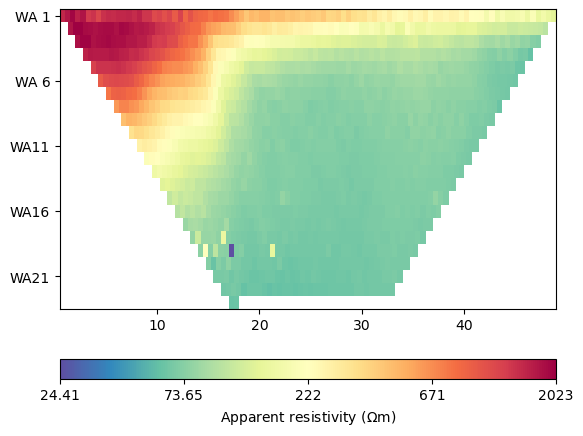

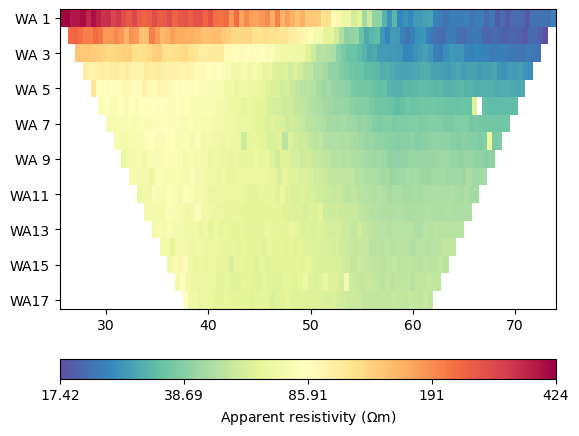

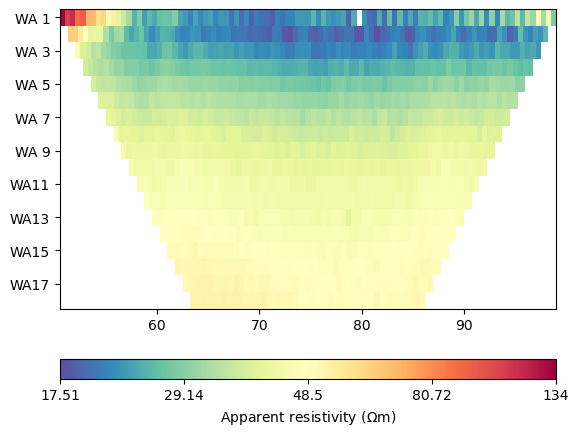

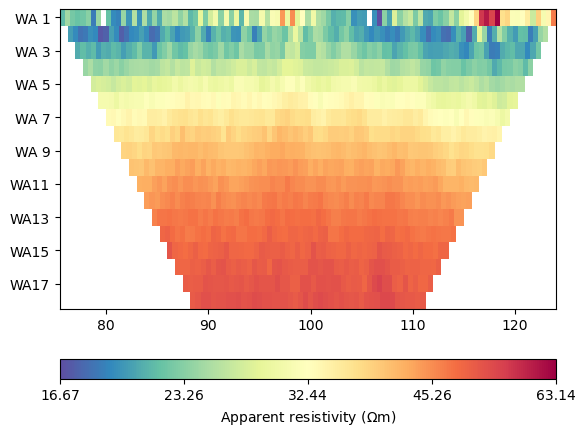

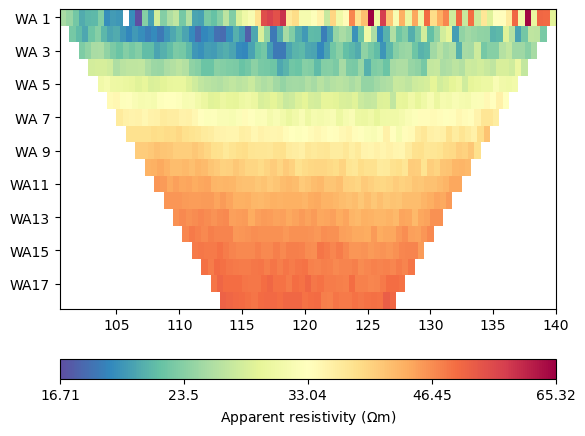

In [5]:
for data in WEN:
    data["k"] = ert.geometricFactors(data)
    data.checkDataValidity()
    data.removeInvalid()
    data.remove(data["rhoa"] < 16)
    ert.showData(data)

Save all data into single data containers for single hand-processing.

In [6]:
parts = "abcde"
for i, data in enumerate(WEN):
    data.save(basename+parts[i]+"wen.dat", "a b m n u i k rhoa")

Combine all data sets.

In [7]:
allwen = pg.DataContainerERT()
for data in WEN:
    allwen.add(data)

Remove highest pentrations to achieve some homogeneity.

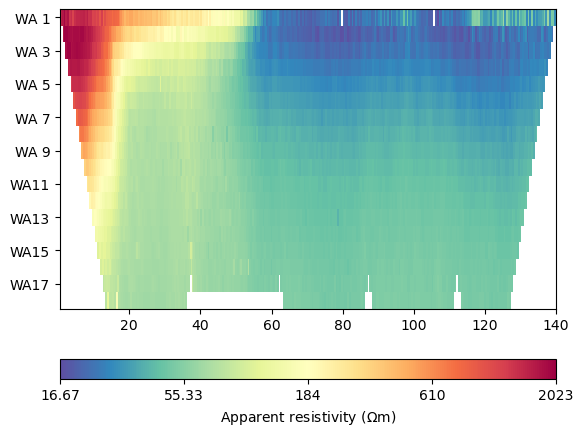

In [8]:
allwen.remove(allwen["m"] - allwen["a"] > 18)
ert.show(allwen);

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x28d2c5c7940>)

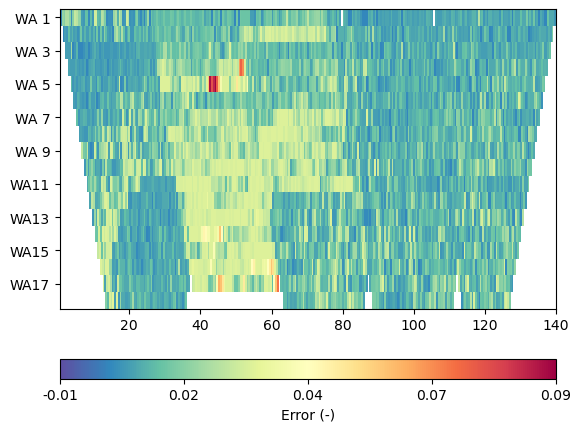

In [9]:
ert.show(allwen, "err")

Now load in the Wenner-beta data. The last needs to be translated.

In [10]:
WB = [pb.load(basename+part+".wnb") for part in "abe"]
WB[-1].translate([100, 0])

23/06/23 - 08:55:29 - pyGIMLi - INFO - imported:  Data: Electrodes: 100 data: 1192
23/06/23 - 08:55:29 - pyGIMLi - INFO - imported:  Data: Electrodes: 100 data: 1192
23/06/23 - 08:55:29 - pyGIMLi - INFO - imported:  Data: Electrodes: 82 data: 904


In [11]:
parts = "abe"
for i, data in enumerate(WB):
    data.save(basename+parts[i]+"wb.dat", "a b m n u i k rhoa")

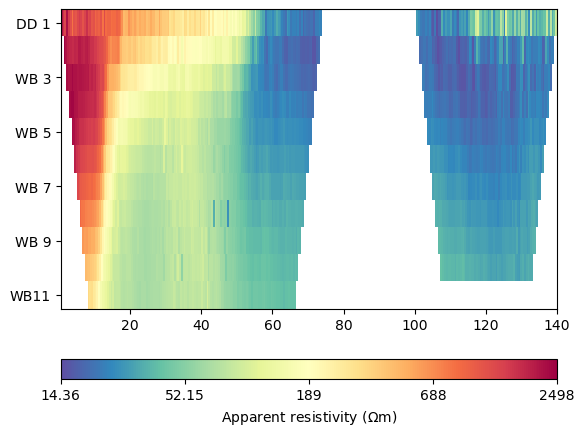

In [12]:
allwb = pg.DataContainerERT()
for data in WB:
    data["k"] = ert.geometricFactors(data)
    data.checkDataValidity()
    data.removeInvalid()
    allwb.add(data)

ert.show(allwb);

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x28d2e7a6a30>)

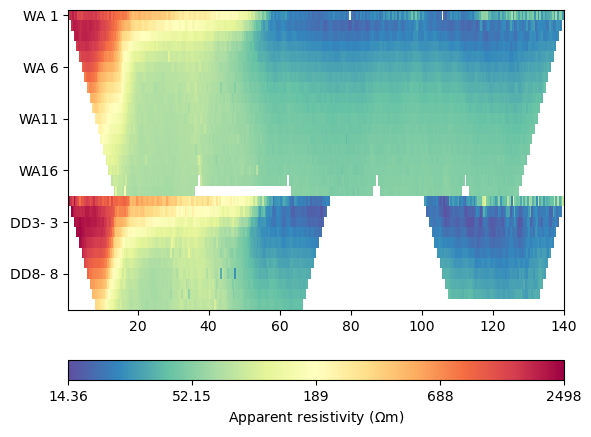

In [13]:
alldata = pg.DataContainerERT(allwen)
alldata.add(allwb)
ert.show(alldata)